# Neural Networks: Activation Functions

## A General Description of Neural Networks (NN)

**Neural networks are composed of:**

<img src="https://www.i2tutorials.com/wp-content/uploads/2019/09/Deep-learning-40-i2tutorials.png">

 * Input Layer - where the data is fed into the NN
 * Hidden Layer(s) - groups of nodes/perceptrons/neurons implementing mathematical transformations on the data
 * Output Layer - node(s) generating the NN's prediction
  * The number of nodes in the output layer should be equal to the number of classes in multiclassification task (binary classification and regression tasks should have single node)
  * Mathematical transformations happen in these nodes
  
**Mathematical Transformations in Nodes:**

1. Linear 
$$z = wx + b$$
  * Where; $w$ is the weight coefficient, $x$ is the data, and $b$ is the bias term
  
2. Activation Function
$$a = f(z)$$
  * Where; $f(z)$ is the activation function evaluated at value $z$ (the product of the linear transformation)
  
**Three Steps:**
1. Forward Propagation - applying mathematical transformations to the input data as it moves through the layers of the NN to ultimately produce a prediction.

2. Calculate Loss and Cost - determining how wrong the NN is from the ground-truth labels
  * Loss $\to$ how far off the predicted value ($\hat{y}$) is from the ground-truth ($y$) for each data point
    * $\mathcal{L}(\hat{y} - y)$
  * Cost $\to$ average of the loss across all training instances
    * $\mathcal{J}(w, b) = \frac{1}{m}\sum(\mathcal{L}(\hat{y} - y))$
  
3. Back Propagation - update the weights and bias values for the nodes in the layers of the NN based on gradient descent
  * Calculate derivatives of mathematical transformations to get step size for gradient descent
    * $da$ is the derivative of the activation function
    * $dz = da * da(z)$
    * $dw = dz * x$
    * $db = dz$
  * Update the values for the weights and biases
    * $w_{\text{updated}} = w - \alpha * dw$
    * $b_{\text{updated}} = w - \alpha * db$
    * $\alpha$ is the learning rate (a tunable parameter)
    
    
I highly recommend looking at [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.91468&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to help build an intuition for how a neural network "learns" a classification task

## Activation Functions

**Definition:** transfer functions that are used to map the output of one layer to the input of another layer

[Great reasource for visualizing activation functions](https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/)

[Overview of Select Activation Functions](http://www.machineintellegence.com/different-types-of-activation-functions-in-keras/) - similar to this presentation

[Another Overview of Select Activation Functions](https://codeodysseys.com/posts/activation-functions/) - again, similar style of presentation


1. Sigmoid Function - typically used as the output layer for binary classification tasks
  * **Pros:** Outputs values in range of 0 to 1, which correspond to the probability of the observation's class (think logistic regression)
  * **Cons:** As the values of $z$ (product of the linear transformation) get larger in the positive direction or smaller in the negative direction, the derivative of the activation function approaches zero
    * Slows down gradient descent (learning)
    



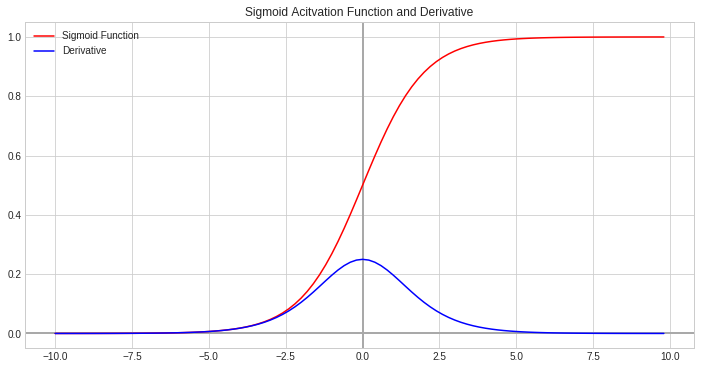

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f
  
z = np.arange(-10,10,0.2)
  
y = sigmoid(z)
dy = sigmoid(z, derivative=True)

fig = plt.figure(figsize=(12,6))
plt.axhline(color="darkgray", linewidth=2,)
plt.axvline(color="darkgray", linewidth=2,)
plt.title("Sigmoid Acitvation Function and Derivative")
plt.plot(z, y, 'r', label='Sigmoid Function')
plt.plot(z, dy, 'b', label='Derivative')
plt.legend()
plt.show()

2. Hyperbolic Tangent (tanh) Function - similar to sigmoid function, but typically used in hidden layers for binary classification tasks
  * **Pros:** Outputs values between -1 and 1, which centers data around zero and makes optimization easier. 
  * **Cons:** The derivative of the tanh activation function still eventually approaches zero, and therefore slows down learning. Also, the function flattens out quicker than the sigmoid function, thus learning slows down quicker.

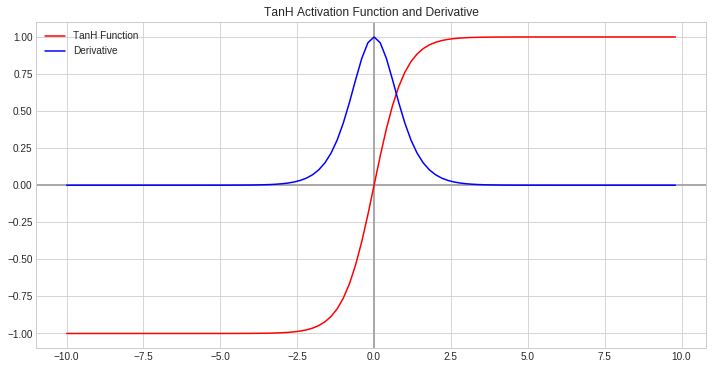

In [9]:
def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)
  

y = tanh(z)
dy = tanh(z, derivative=True)

fig = plt.figure(figsize=(12,6))

plt.title("TanH Activation Function and Derivative")
plt.axhline(color="darkgray", linewidth=2,)
plt.axvline(color="darkgray", linewidth=2,)
plt.plot(z, y, 'r', label='TanH Function')
plt.plot(z, dy, 'b', label='Derivative')
plt.legend()
plt.show()

3. Inverse Tangent (arctan) Function - Similar qualities as tanh, but attempts to overcome the vanishing gradient issue by smoothing the curve into the asymtotic plateaus
  * **Pros:** Outputs values between $-\frac{\pi}{2}$ and $\frac{\pi}{2}$, so again the data is centered around zero making optimization easier. Also, takes longer to flatten out $\to$ makes learning more efficient
  * **Cons:** Calculating the derviative of arctan is more computationally expensive

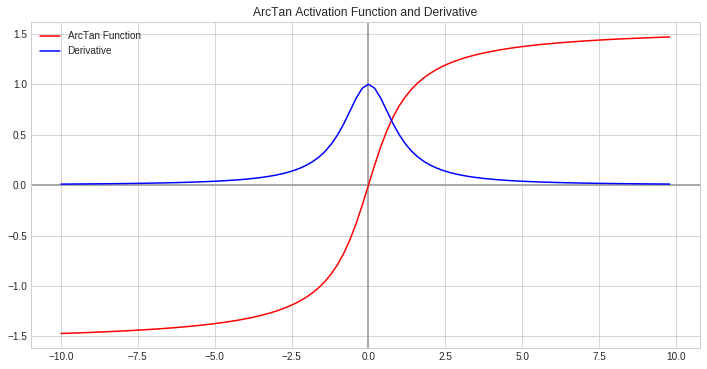

In [10]:
def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)
  
y = arctan(z)
dy = arctan(z, derivative = True)

fig = plt.figure(figsize=(12,6))
plt.title("ArcTan Activation Function and Derivative")
plt.axhline(color="darkgray", linewidth=2,)
plt.axvline(color="darkgray", linewidth=2,)
plt.plot(z, y, 'r', label='ArcTan Function')
plt.plot(z, dy, 'b', label='Derivative')
plt.legend()
plt.show()

4. Rectified Linear Unit (ReLU) - **most common activation function** - use it in hidden layers; retains the biological motivation of the step function (neuron only fires if inputs exceed threshold), but has a non-zero derivative at positive inputs, which allows gradient-based learning (though the derivative is undefined at exactly 0)
  * **Pros:** Provides all of the same benefits as activation functions previously discussed, but with better performance. Easy and quick to calculate function/derivative $\to$ no complex math
  * **Cons:** Can result in dead neurons (nodes unable to update weights and biases) if input values are less than zero

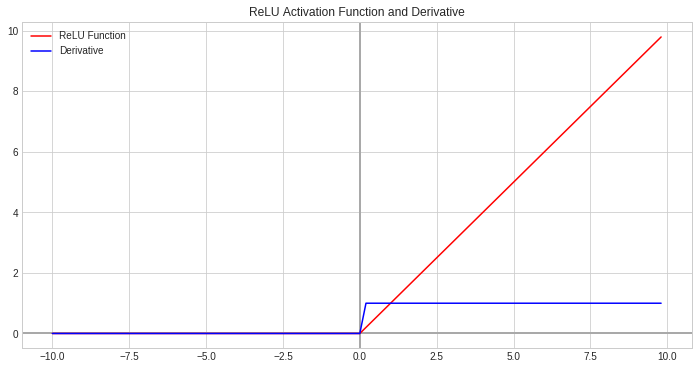

In [11]:
def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f
  

y = relu(z)
dy = relu(z, derivative=True)

fig = plt.figure(figsize=(12,6))
plt.title("ReLU Activation Function and Derivative")
plt.axhline(color="darkgray", linewidth=2,)
plt.axvline(color="darkgray", linewidth=2,)
plt.plot(z, y, 'r', label='ReLU Function')
plt.plot(z, dy, 'b', label='Derivative')

plt.legend()
plt.show()

5. Leaky ReLU - variant of ReLU that attemps to resolve the dead gradient problem by allowing a small, non-zero, constant gradient α (normally, α=0.01) for z < 0
  * **Pros:** The small slope for negative values allows for continuous gradient based learning as the derivative is never zero
  * **Cons:** Because it possess linearity, it can not be used for complex classification tasks $\to$ source? need to check if this is true

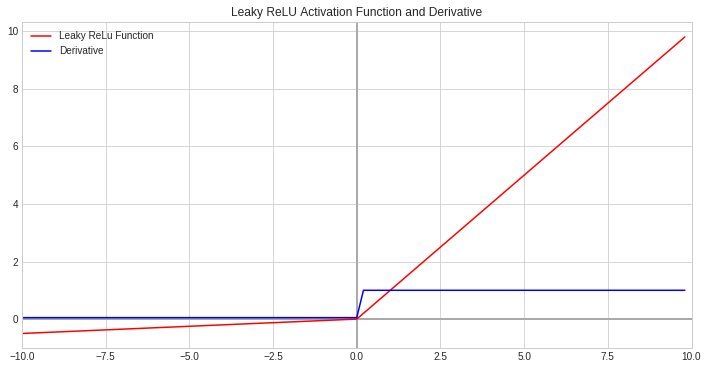

In [12]:
# the default leakage here is 0.05!
def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f
  

y = leaky_relu(z)
dy = leaky_relu(z, derivative=True)

fig = plt.figure(figsize=(12,6))
plt.axhline(color="darkgray", linewidth=2,)
plt.axvline(color="darkgray", linewidth=2,)
plt.title("Leaky ReLU Activation Function and Derivative")
plt.xlim(-10,10)
plt.plot(z, y, 'r', label='Leaky ReLu Function')
plt.plot(z, dy, 'b', label='Derivative')
plt.legend()
plt.show()

6. SoftMax - calculate the probabilities of each target class over all possible target classes

  * Converts the input of the neuron into the range of 0 and 1 in such a way that the total sum of the outputs is equal to 1 and where the value of the output represents the probability of the input belonging to each class
  * Typically used in the output layer of a multiclassification task

In [0]:
def softmax (inputs):
  return np.exp(inputs) / (np.sum(np.exp(inputs)))

softmax([2,1,0.1])

array([0.65900114, 0.24243297, 0.09856589])

<p align="center">
  <img src="https://miro.medium.com/max/1228/1*l6GNTFihUu0EuUMUGHMwpA.png">
  </p>

<p align="center">
<img src="https://deepnotes.io/public/images/softmax.png">
</p>

<p align="center">
<img src="https://lichtphyz.github.io/images/SoftMax%20Desmos.png" width="450">
</p>